# Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Mounted at /content/drive


# Read & Analyze Data

In [2]:
file_path = 'training_data.csv'
df = pd.read_csv(file_path)
df.head()

,size (square feet),number of bedrooms,price ($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- Comment: 
+ There are 3 column data:
   - Size - Integer
   - number of bedrooms - Integer 
   - price - Integer
+  Unit: 
   - Size - square feet
   - number of bedrooms
   - price - $

+ Independent Variable: Size, number of bedrooms; 
+ Dependent Variable: Price;


In [3]:
df.describe()

,size (square feet),number of bedrooms,price ($)
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- Comment: 
+ Min Value (Giá trị bé nhất): 
  - size = 852
  - number of bedroom = 1
  - price = 169900

+ Max Value (Giá trị lớn nhất): 
  - size = 4478
  - number of bedroom = 5
  - price = 699900

+ Average value (Giá trị trung bình): 
  - size = 2000 
  - number of bedroom = 3
  - price = 340413

+ Standard deviation (Độ lệch chuẩn): 
  - size = 794
  - number of bedroom = 0.76
  - price = 125040


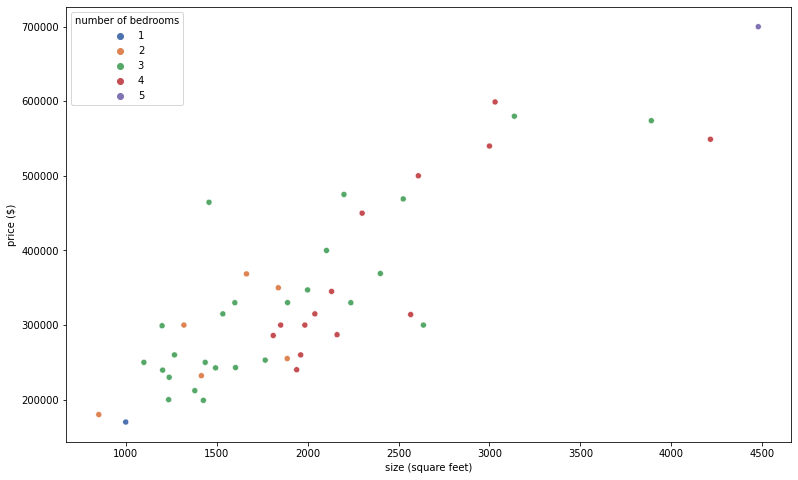

In [4]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(data=df, x='size (square feet)', y='price ($)', 
                     hue='number of bedrooms', palette='deep')
plt.show()

Comment: 
 
+ Number of beds are represented as point with 5 colors as 5 values

+ price is covariated with num of bedrooms and size  

# Helper Functions

In [5]:
def standardize_train_set(X):

    #todo
    mu = np.mean(X,axis=0)

    #todo
    sigma = []
    for col in range(2):
        s = 0
        for e in range(len(X)):
            s+=(X[e][col]-mu[col])**2
        s = (s/(len(X)-1))**0.5
        sigma.append(s)

    #todo
    X_norm = (X-mu)/sigma
    
    return X_norm, mu, sigma

In [6]:
def standardize_test_set(X, mu, sigma):
    #todo
    return (X-mu)/sigma

In [7]:
class LinearRegression:
    def __init__(self, alpha=0.001, iters=1000, verbose=False):
        self.alpha = alpha
        self.iters = iters
        self.verbose = verbose
        self.theta = None
    
    def calculate_absolute_error(self, X, y, theta):
        #todo
        return np.absolute(np.subtract(X@theta, y)).mean()
    
    def gradient(self, X, y, theta):
        m = len(y)

        #todo
        h_theta =  X @ theta
        loss = h_theta - y

        #todo
        dJ = (X.T @ loss)/m
        J = np.sum((loss ** 2) / (2*m))

        return (J, dJ)
    
    def gradient_descent(self, X, y):
        X = np.c_[np.ones(len(X),dtype='int64'), X]
        theta = np.zeros(X.shape[1])
        print(f'The total of training sample: {len(y)}')
        for i in range(self.iters):
            #todo
            J, dJ =  self.gradient(X,y,theta)
            #todo
            theta = theta - self.alpha*dJ
            if self.verbose:
                print(f'Iter {i + 1}, loss = {self.calculate_absolute_error(X, y, theta)}')
        return theta
    
    def fit(self, X, y):
        self.theta = self.gradient_descent(X, y)
    
    def predict(self, X):
        results = []
        for Xi in X:
            #todo
            results.append(Xi@self.theta[1:] + self.theta[0])
        return results

# Main Function

## Train Model

In [8]:
#Load config
with open('config.json',) as f:
    configs = json.load(f)

#Feature-Label split
#todo
X = np.array(df.iloc[:,:2])
#todo
y = np.array(df.iloc[:,2:]).reshape((-1,))

#Standardize feature and Train model
X, mu, sigma = standardize_train_set(X)

model = LinearRegression(alpha= configs['alpha'], iters=configs['iters'], verbose=False)
model.fit(X, y)

The total of training sample: 47


## Visualize Model

In [9]:
x_surf, y_surf = np.meshgrid(np.linspace(df['size (square feet)'].min(), 
                                         df['size (square feet)'].max()),
                                         np.linspace(df['number of bedrooms'].min(), 
                                                     df['number of bedrooms'].max()))

surf_df = pd.DataFrame({'size (square feet)': x_surf.ravel(), 
                        'number of bedrooms': y_surf.ravel()})

predicted = np.array(model.predict(standardize_test_set(surf_df.values, mu, sigma)))

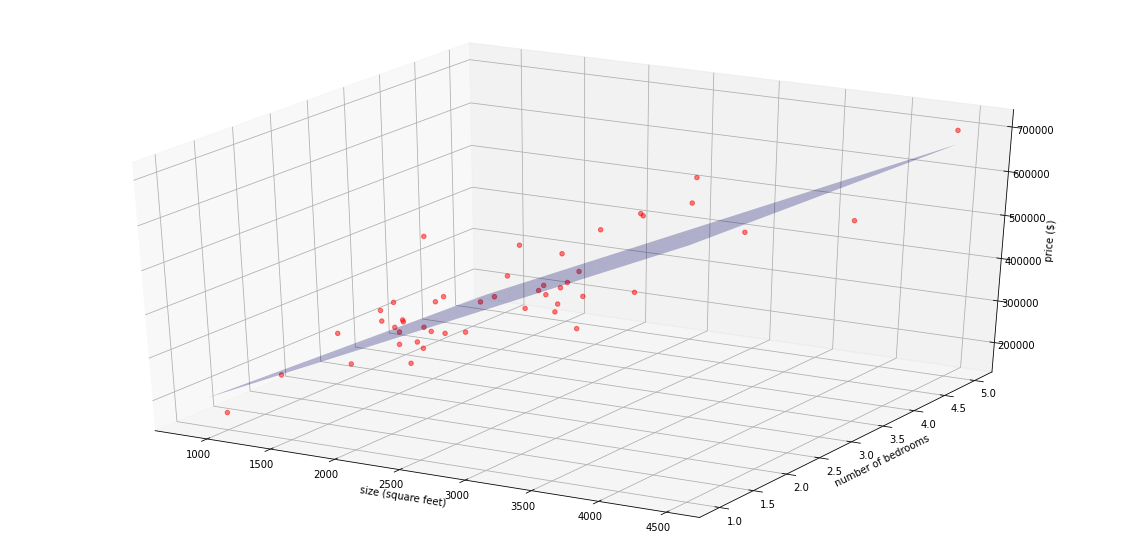

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['size (square feet)'], df['number of bedrooms']
           ,df['price ($)'], c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predicted.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel('size (square feet)')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price ($)')
plt.show()

- Comment: 
  - Data are presented in a 3 dimensions graph
  - Predicted Data are presented as blue surface
  - The red dots are real data

## Predict Sample

In [19]:
#Sample: Size: 1650, numbers of bedroom: 3, use this and predict new price value
sample = [1650, 3]

#todo
sample_norm = standardize_test_set(sample,mu,sigma)
y_predict = model.predict([sample_norm])

print(f'House price expected is {round(y_predict[0])}$')

House price expected is 293237$


## Save Results

In [ ]:
pip install simplejson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 24.0 MB/s 


In [20]:
#Save model
with open('model.json', 'w') as f:
    #todo
    json.dump({'theta: ': model.theta.tolist()}, f)
    
#Save prediction result
with open('price.json', 'w') as f:
    print(sample[0])
    result = {
       
        #todo
        'size (square feet): ':  sample[0],
        #todo
        'number of bedrooms': sample[1],
        #todo
        'price ($)':  y_predict[0]
    }

    json.dump(result, f)

1650
